# **Import Libraries:**

1. **Pandas (`pd`)**: For data loading, manipulation, and analysis.  
2. **NumPy (`np`)**: For numerical operations and efficient array handling.  
3. **Seaborn (`sns`)**: For advanced data visualizations (e.g., box plots, heatmaps).  
4. **Matplotlib (`plt`)**: For basic plotting and customizing visualizations.  
5. **Scikit-learn**:  
   - `train_test_split`: Splitting data into training/testing sets.  
   - `StandardScaler`: Standardizing features for uniform scale.  
   - `LabelEncoder`: Encoding target variables for modeling.  
6. **Imbalanced-learn (SMOTE)**: Balancing imbalanced datasets by oversampling minority classes.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


### **Data Loading and Outlier Visualization**

1. **Loading the Dataset**:
   - The dataset is loaded using **Pandas** with a semicolon (`;`) separator.
   ```python
   data = pd.read_csv("/content/winequality-red.csv", sep=";")
   
- **Semicolon separator:** The dataset uses semicolons (`;`) to separate values instead of commas, so we specify the separator when loading the file.
- **Missing values:** This step ensures we know if there are any incomplete data entries, which could lead to issues in analysis or modeling.
- **Outliers:** Box plots visually identify extreme data points that might negatively affect model performance, so understanding and addressing them is crucial.





Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


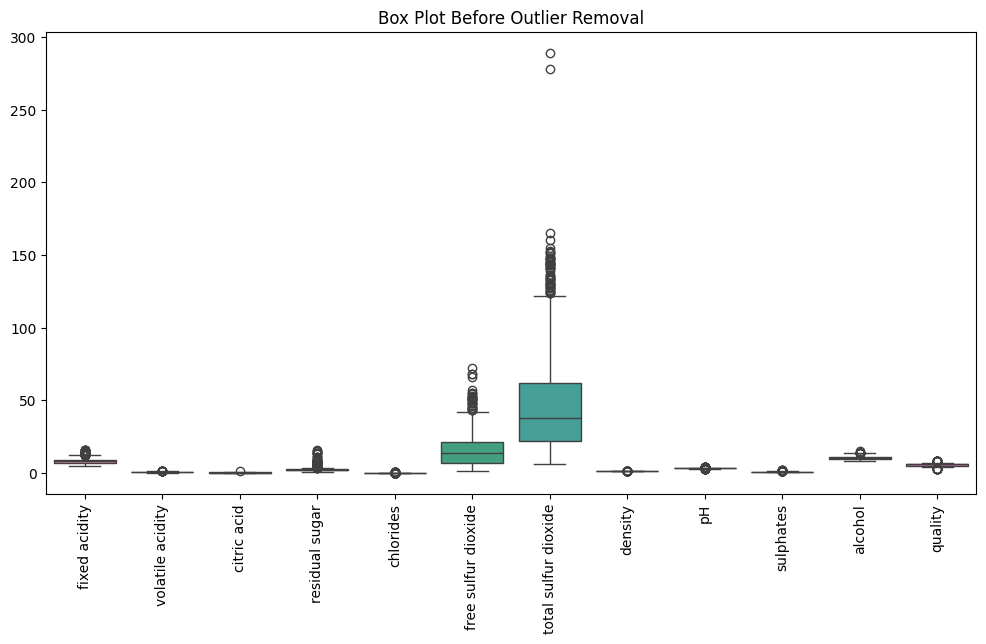

In [ ]:
# Load data with semicolon separator
data = pd.read_csv("/content/winequality-red.csv", sep=";")

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Box plot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Box Plot Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()


###   **Data Preprocessing Explanation**
1. **Missing Values**:
   - There are no missing values in the dataset, as seen in the initial data summary.
2. **Outliers**:
   - The box plot before outlier removal indicates the presence of outliers in several columns.
   - Outliers are being handled iteratively using the Interquartile Range (IQR) method with a multiplier of 1.5.
   - After removing outliers, a new box plot is generated to verify the cleaned data.


Data shape after outlier removal: (923, 12)


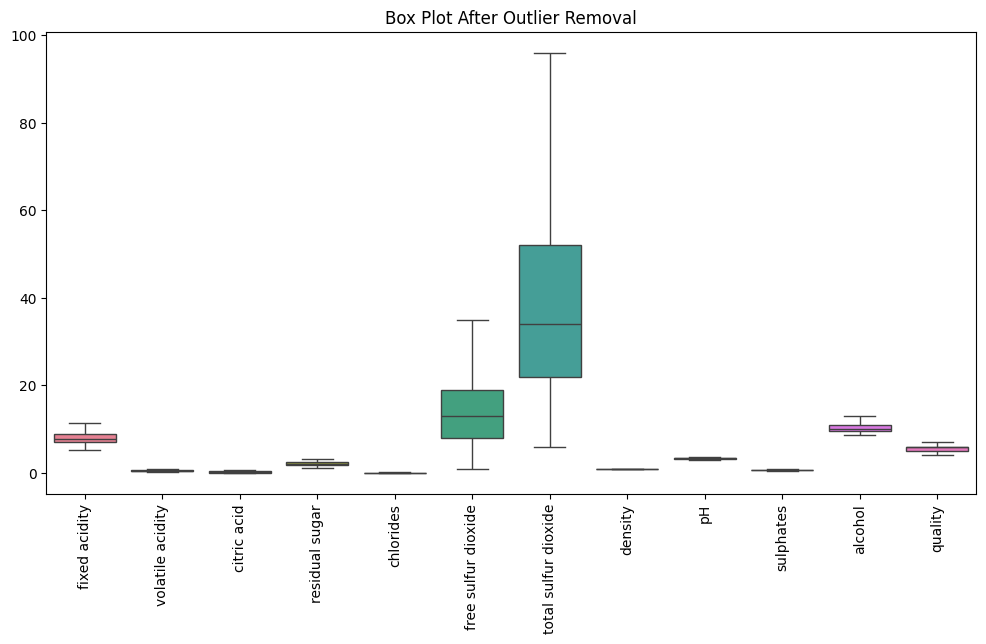

In [ ]:
# Function to remove outliers iteratively
def remove_outliers(df, multiplier=1.5):
    while True:
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (df < (Q1 - multiplier * IQR)) | (df > (Q3 + multiplier * IQR))
        num_outliers = outlier_condition.any(axis=1).sum()
        if num_outliers == 0:
            break
        df = df[~outlier_condition.any(axis=1)]
    return df

# Removing outliers iteratively
data_no_outliers = remove_outliers(data)
print(f"Data shape after outlier removal: {data_no_outliers.shape}")

# Box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers)
plt.title("Box Plot After Outlier Removal")
plt.xticks(rotation=90)
plt.show()


### **Preprocessing and Data Balancing Steps**
1. **Feature and Target Separation**:
   - The target variable (`quality`) is separated from the features.
2. **Label Encoding**:
   - The target values are encoded using `LabelEncoder` to ensure they are in a continuous numeric format suitable for machine learning algorithms.
3. **Handling Class Imbalance**:
   - SMOTE (Synthetic Minority Oversampling Technique) is applied to address class imbalance in the target variable.
   - After applying SMOTE, the data is resampled to ensure balanced classes.
4. **Train-Test Split**:
   - The dataset is split into training and testing sets with an 80:20 ratio to evaluate the model's performance.
5. **Feature Standardization**:
   - The features are standardized using `StandardScaler` to ensure uniformity in the range of feature values, improving model performance.
6. **Feature Distribution Visualization**:
   - The feature distribution after standardization is visualized using density plots for each feature to ensure the standardization process worked correctly.


Class Distribution Before SMOTE:
 2    406
1    388
3    102
0     27
Name: count, dtype: int64
Data shape after SMOTE: X=(1624, 11), y=(1624,)
Class Distribution After SMOTE:
 1    406
2    406
3    406
0    406
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


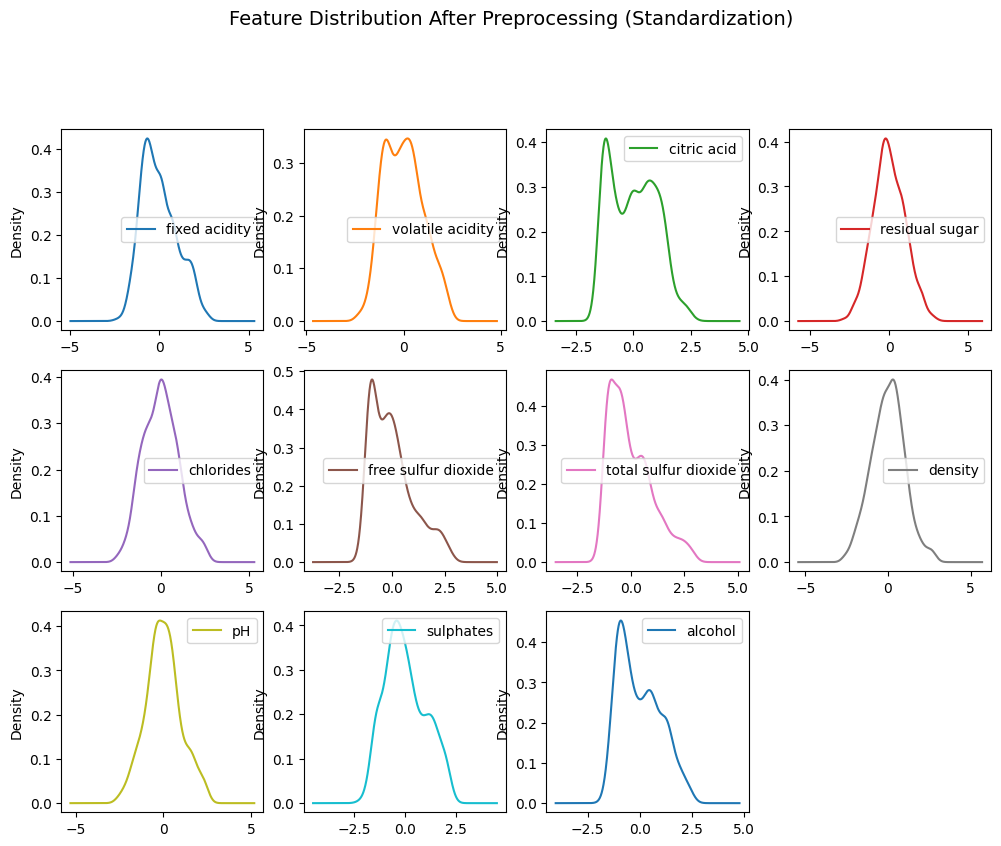

In [ ]:
import pandas as pd
from collections import Counter

# Separate features and target
X = data_no_outliers.drop('quality', axis=1)
y = data_no_outliers['quality']

# Use LabelEncoder to ensure target values are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Analyze class distribution before SMOTE (optional)
y_series = pd.Series(y)
class_counts = y_series.value_counts().sort_values(ascending=False)
print("Class Distribution Before SMOTE:\n", class_counts)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f"Data shape after SMOTE: X={X_resampled.shape}, y={y_resampled.shape}")

# Analyze class distribution after SMOTE (optional)
y_resampled_series = pd.Series(y_resampled)
class_counts_resampled = y_resampled_series.value_counts().sort_values(ascending=False)
print("Class Distribution After SMOTE:\n", class_counts_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot feature distribution after preprocessing (standardization)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 12))
plt.suptitle("Feature Distribution After Preprocessing (Standardization)", fontsize=14)
plt.show()

### **Correlation Analysis**
1. **Purpose**:
   - A correlation heatmap is used to visualize the relationships between features in the dataset.
   - It helps identify features that are strongly correlated, either positively or negatively, which might affect the model's performance.

2. **Steps**:
   - The correlation matrix is calculated for the standardized features in the training dataset.
   - A heatmap is plotted using `seaborn` to highlight the strength and direction of correlations:
     - Values closer to **1** indicate strong positive correlation.
     - Values closer to **-1** indicate strong negative correlation.
     - Values near **0** indicate little to no correlation.

3. **Insights**:
   - Highly correlated features may indicate redundancy, and such features might be candidates for removal or dimensionality reduction (e.g., PCA).
   - Understanding feature relationships can guide feature engineering and model selection.


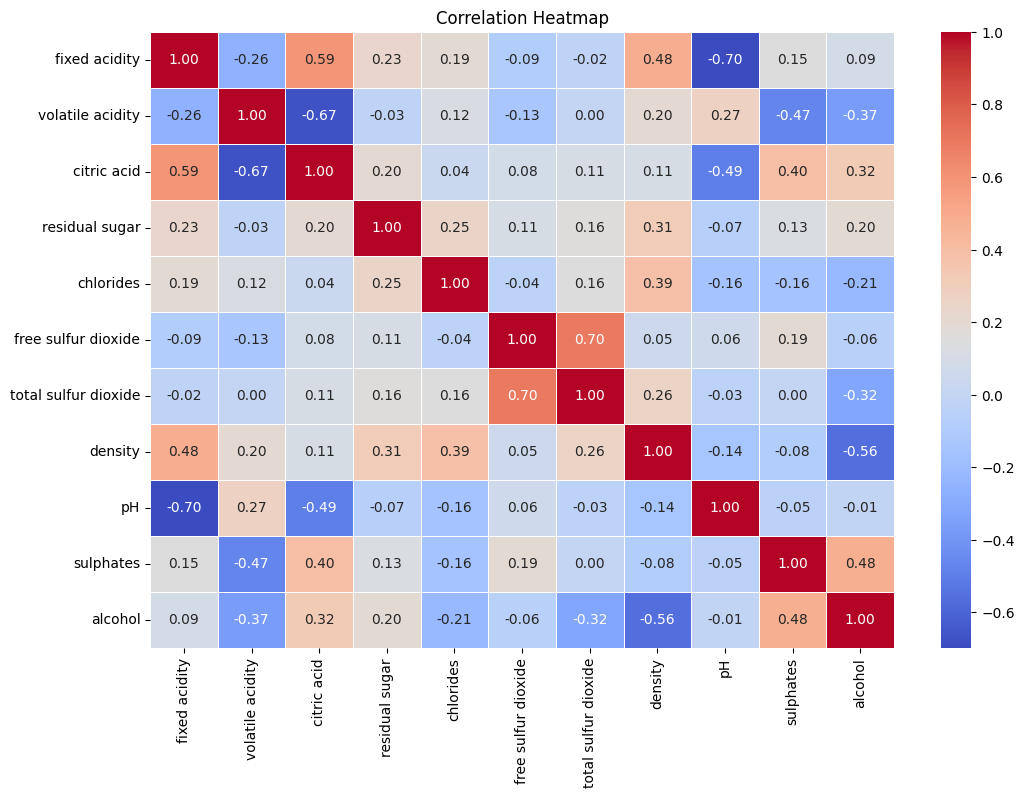

In [ ]:
# Correlation Heatmap
corr_matrix = pd.DataFrame(X_train, columns=X.columns).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### **Saving the Preprocessed Dataset**
1. **Purpose**:
   - The preprocessed dataset, after handling outliers, balancing classes using SMOTE, and standardizing features, is saved for future use.
   - Saving the data ensures that the preprocessing steps do not need to be repeated, making subsequent analysis or modeling more efficient.

2. **Steps**:
   - A new DataFrame is created with the resampled feature set (`X_resampled`) and the corresponding target variable (`quality`).
   - The dataset is exported to a CSV file named `preprocessed_winequality.csv` in the specified path.
   - The `index=False` parameter ensures that the DataFrame's index is not saved as a separate column.

In [ ]:
# Save the preprocessed dataset to a CSV file
preprocessed_data = pd.DataFrame(X_resampled, columns=X.columns)
preprocessed_data['quality'] = y_resampled
preprocessed_data.to_csv("/content/preprocessed_winequality.csv", index=False)
print(f"Preprocessed dataset saved to: /content/preprocessed_winequality.csv")


Preprocessed dataset saved to: /content/preprocessed_winequality.csv


### **Defining Individual Models**
- **Purpose**: Define machine learning models for classification.
- **Models**:
  1. **Random Forest (RFC)**: Builds multiple decision trees for stable predictions.
  2. **Gradient Boosting (GBC)**: Sequentially minimizes errors with boosting.
  3. **LightGBM (LGBM)**: Fast, efficient gradient boosting.
  4. **Support Vector Classifier (SVC)**: Finds the best hyperplane for classification.
- **Next Step**: Use these models for training or ensemble techniques.


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define individual models
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
lgb_clf = lgb.LGBMClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
svc = SVC(kernel='rbf', random_state=42)

print("Individual models defined successfully.")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Individual models defined successfully.


### **Hyperparameter Tuning for Classifiers**
- **Purpose**: Optimize model performance by searching for the best combination of parameters using `GridSearchCV`.


#### 1. Random Forest Classifier (RFC)
- **Parameters Tuned**:
  - `n_estimators`: Number of trees ([100, 200, 300]).
  - `max_depth`: Maximum depth of trees ([10, 20, 30]).
  - `min_samples_split`: Minimum samples required to split a node ([2, 5]).
- **Outcome**:
  - Best parameters identified and model retrained.

In [ ]:
# Hyperparameter tuning for RandomForest
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}
grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, n_jobs=-1)
grid_rfc.fit(X_train, y_train)

# Best parameters and retrained Random Forest model
print(f"Best Parameters for RFC: {grid_rfc.best_params_}")
rfc = grid_rfc.best_estimator_


Best Parameters for RFC: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


#### 2. Gradient Boosting Classifier (GBC)
- **Parameters Tuned**:
  - `n_estimators`: Number of boosting stages ([100, 200, 300]).
  - `learning_rate`: Step size for weight updates ([0.01, 0.1, 0.2]).
  - `max_depth`: Maximum depth of individual trees ([3, 5, 7]).
- **Outcome**:
  - Best parameters identified and model retrained.

In [ ]:
#gradient boosting
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5, n_jobs=-1)
grid_gbc.fit(X_train, y_train)
print(f"Best Parameters for GBC: {grid_gbc.best_params_}")
gbc = grid_gbc.best_estimator_


Best Parameters for GBC: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


#### 3. LightGBM Classifier (LGBM)
- **Parameters Tuned**:
  - `n_estimators`: Number of boosting stages ([100, 200, 300]).
  - `learning_rate`: Step size for weight updates ([0.01, 0.1, 0.2]).
  - `num_leaves`: Maximum number of leaves per tree ([31, 50, 70]).
- **Outcome**:
  - Best parameters identified and model retrained.

In [ ]:
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 70]
}
grid_lgb = GridSearchCV(lgb_clf, param_grid_lgb, cv=5, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
print(f"Best Parameters for LightGBM: {grid_lgb.best_params_}")
lgb_clf = grid_lgb.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 11
[LightGBM] [Info] Start training from score -1.385525
[LightGBM] [Info] Start training from score -1.388607
[LightGBM] [Info] Start training from score -1.439250
[LightGBM] [Info] Start training from score -1.334539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

#### 4. Support Vector Classifier (SVC)
- **Parameters Tuned**:
  - `C`: Regularization parameter ([0.1, 1, 10]).
  - `kernel`: Type of kernel function (`linear`, `rbf`, `poly`).
  - `gamma`: Kernel coefficient ([0.01, 0.1, 1]).
- **Outcome**:
  - Best parameters identified and model retrained.

In [ ]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1]
}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, n_jobs=-1)
grid_svc.fit(X_train, y_train)
print(f"Best Parameters for SVC: {grid_svc.best_params_}")
svc = grid_svc.best_estimator_


Best Parameters for SVC: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


### **Training Individual Models**
- **Objective**: Train each classifier using the preprocessed training data.
- **Models Trained**:
  1. **Random Forest Classifier (RFC)**: Trained with the optimal hyperparameters.
  2. **Gradient Boosting Classifier (GBC)**: Trained with the optimal hyperparameters.
  3. **LightGBM Classifier (LGBM)**: Trained with the optimal hyperparameters.
  4. **Support Vector Classifier (SVC)**: Trained with the optimal hyperparameters.

In [ ]:
# Train individual models
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
lgb_clf.fit(X_train, y_train)
svc.fit(X_train, y_train)

print("Individual models trained successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 11
[LightGBM] [Info] Start training from score -1.385525
[LightGBM] [Info] Start training from score -1.388607
[LightGBM] [Info] Start training from score -1.439250
[LightGBM] [Info] Start training from score -1.334539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

### **Training the Ensemble Classifier**
- **Objective**: Combine the predictions of multiple individual models using a soft voting ensemble to improve performance and robustness.
- **Method**:
  - **Soft Voting**: Averages the predicted probabilities of each model and selects the class with the highest average probability.
- **Models Included in the Ensemble**:
  1. **Random Forest Classifier (RFC)**
  2. **Gradient Boosting Classifier (GBC)**
  3. **LightGBM Classifier (LGBM)**

In [ ]:
# Ensemble Classifier (soft voting)
ensemble_clf = VotingClassifier(
    estimators=[
        ('RandomForest', rfc),
        ('GradientBoosting', gbc),
        ('LightGBM', lgb_clf)
    ],
    voting='soft'
)

# Train Ensemble Classifier
ensemble_clf.fit(X_train, y_train)

print("Ensemble Classifier trained successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 11
[LightGBM] [Info] Start training from score -1.385525
[LightGBM] [Info] Start training from score -1.388607
[LightGBM] [Info] Start training from score -1.439250
[LightGBM] [Info] Start training from score -1.334539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

### **Training the Ensemble Classifier**

**Objective**:
Combine the predictions of multiple individual models to improve performance and robustness.

**Method**:
The ensemble method aggregates the predictions of multiple models. In this case, the **final estimator** uses a Random Forest Classifier to combine the outputs of the base models.

- **Soft Voting**: Averages the predicted probabilities of each model and selects the class with the highest average probability.

**Models Included in the Ensemble**:
- **Random Forest Classifier (RFC)**
- **Support Vector Classifier (SVC)**

The final decision is made by the Random Forest Classifier, which integrates the predictions of the two base models to provide a more accurate and stable outcome.


In [ ]:
# Ensemble Model (Stacking-based)
ensemble_model_stacking = StackingClassifier(
    estimators=[
        ('RandomForest', rfc),
        ('SVM', svc)
    ],
    final_estimator=RandomForestClassifier(random_state=42)
)

# Train the Ensemble Model (Stacking)
ensemble_model_stacking.fit(X_train, y_train)

print("Ensemble Model trained successfully.")


Ensemble Model trained successfully.


### **Importing Evaluation Libraries**

**Objective**:
Import necessary libraries to evaluate the performance of machine learning models.

**Libraries**:
- **classification_report**: Provides a detailed report on precision, recall, f1-score, and support for each class.
- **confusion_matrix**: Computes confusion matrix to evaluate the performance of classification algorithms.
- **accuracy_score**: Measures the accuracy of the model by comparing predicted values with true values.
- **roc_auc_score**: Calculates the Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score, a performance metric for binary classification.
- **seaborn**: Used for creating heatmaps and other statistical plots.
- **matplotlib.pyplot**: Used for plotting graphs like confusion matrix and ROC curves.
- **roc_curve**: Computes the ROC curve values to plot the True Positive Rate vs. False Positive Rate.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

print("Libraries for evaluation successfully imported.")


Libraries for evaluation successfully imported.


### **Initializing the Models List**

**Objective**:
Ensure that all the trained models are available for evaluation and comparison.

**Models**:
A list of the trained models used for classification.

**Models Included**:
- **Random Forest Classifier (RFC)**: A robust ensemble model using decision trees.
- **Gradient Boosting Classifier (GBC)**: A boosting model that improves prediction by focusing on misclassified instances.
- **LightGBM Classifier (LGBM)**: A gradient boosting framework that is optimized for efficiency and speed.
- **Support Vector Machine (SVM)**: A powerful model that finds the optimal hyperplane to separate classes.
- **Voting Ensemble**: Combines the predictions of multiple classifiers using soft voting.
- **Stacking Ensemble**: A meta-model that combines predictions from base models, trained by a final estimator.

In [ ]:
# Ensure the trained models are available
models = [rfc, gbc, lgb_clf, svc, ensemble_clf, ensemble_model_stacking]
model_names = ['RandomForest', 'GradientBoosting', 'LightGBM', 'SVM', 'Voting Ensemble', 'Stacking Ensemble']

print("Models list initialized successfully.")

Models list initialized successfully.


### **Evaluating the Models**

**Objective**:
Evaluate the performance of the trained models using accuracy and classification metrics.

**Method**:
For each model, predictions are made on the test set (`X_test`), and the accuracy along with the classification report (which includes precision, recall, F1-score, and support) is printed. The results are stored in a dictionary for easy comparison.

**Models Evaluated**:
- **Random Forest Classifier (RFC)**
- **Gradient Boosting Classifier (GBC)**
- **LightGBM Classifier (LGBM)**
- **Ensemble (RFC+GBC+LIGHTBGM)**
- **Ensemble(RFC+SVC)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['RandomForest', 'GradientBoosting', 'LightGBM', 'SVM', 'Voting Classifier', 'Stacking Classifier']
results = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\n")

    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

print("Model Results:")
for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * 20)

--- RandomForest ---
Accuracy: 0.8092
Precision: 0.8070
Recall: 0.8092
F1-score: 0.8030


--- GradientBoosting ---
Accuracy: 0.8092
Precision: 0.8075
Recall: 0.8092
F1-score: 0.8044


--- LightGBM ---
Accuracy: 0.8215
Precision: 0.8245
Recall: 0.8215
F1-score: 0.8166


--- SVM ---
Accuracy: 0.8308
Precision: 0.8290
Recall: 0.8308
F1-score: 0.8295




/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


--- Voting Classifier ---
Accuracy: 0.8246
Precision: 0.8223
Recall: 0.8246
F1-score: 0.8190


--- Stacking Classifier ---
Accuracy: 0.8462
Precision: 0.8483
Recall: 0.8462
F1-score: 0.8434


Model Results:
--- RandomForest ---
accuracy: 0.8092
precision: 0.8070
recall: 0.8092
f1_score: 0.8030
--------------------
--- GradientBoosting ---
accuracy: 0.8092
precision: 0.8075
recall: 0.8092
f1_score: 0.8044
--------------------
--- LightGBM ---
accuracy: 0.8215
precision: 0.8245
recall: 0.8215
f1_score: 0.8166
--------------------
--- SVM ---
accuracy: 0.8308
precision: 0.8290
recall: 0.8308
f1_score: 0.8295
--------------------
--- Voting Classifier ---
accuracy: 0.8246
precision: 0.8223
recall: 0.8246
f1_score: 0.8190
--------------------
--- Stacking Classifier ---
accuracy: 0.8462
precision: 0.8483
recall: 0.8462
f1_score: 0.8434
--------------------


### **Plotting Confusion Matrices for Model Evaluation**

**Objective**:
Visualize the performance of each model using confusion matrices, which show the number of true positives, true negatives, false positives, and false negatives.

**Method**:
For each model, the predicted values are compared with the actual values (`y_test`), and a confusion matrix is generated. The matrix is then displayed as a heatmap for better interpretation.

**Confusion Matrix**:
- **True Positives (TP)**: Correctly predicted positive instances.
- **True Negatives (TN)**: Correctly predicted negative instances.
- **False Positives (FP)**: Incorrectly predicted as positive.
- **False Negatives (FN)**: Incorrectly predicted as negative.

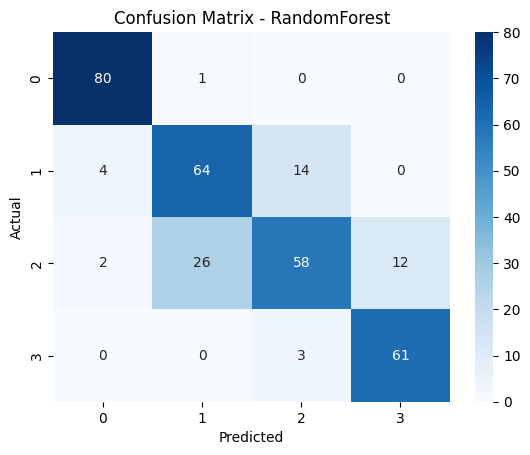

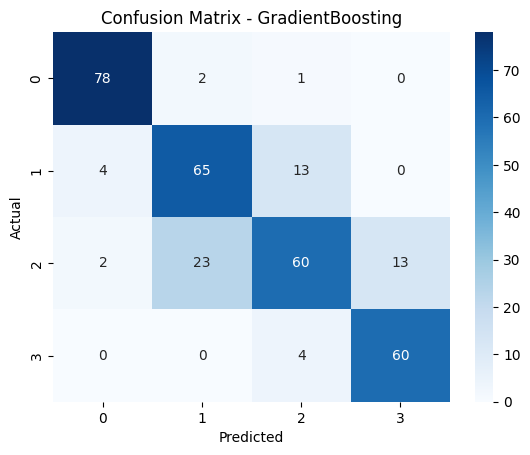

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


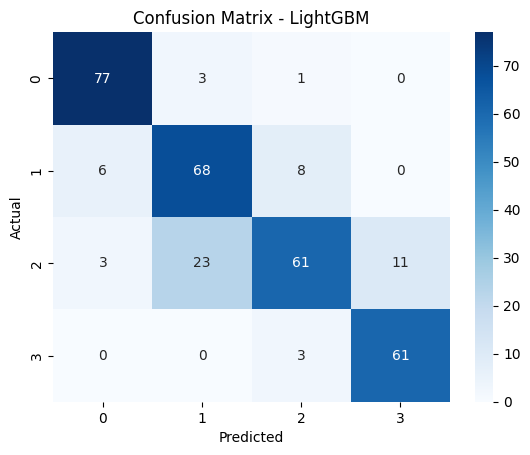

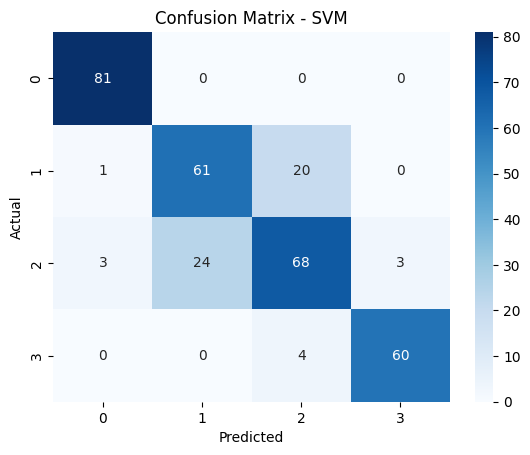

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


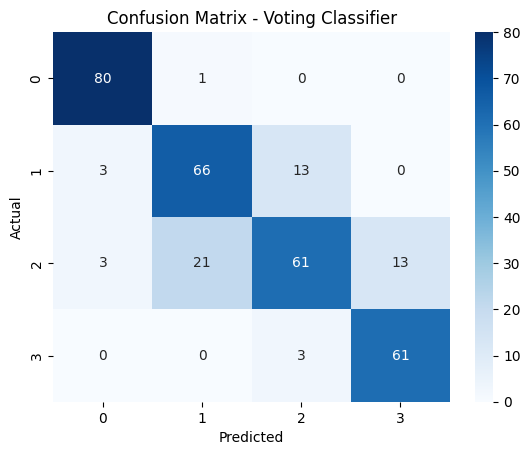

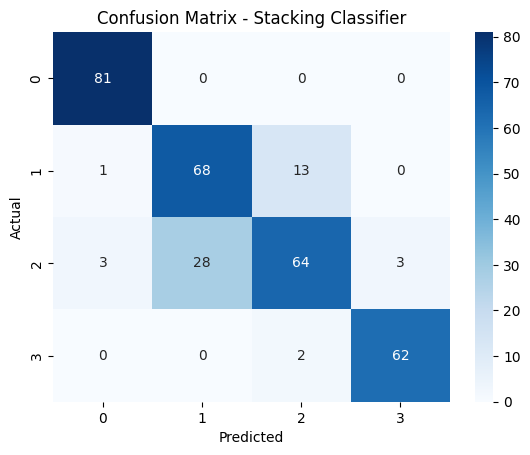

In [ ]:
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### **Evaluating ROC-AUC Scores and Plotting ROC Curves**

**Objective**:
Evaluate the performance of each model based on the ROC-AUC score, which measures the ability of the model to distinguish between classes.

**Method**:
For each model that supports probability prediction (using `predict_proba`), the ROC-AUC score is calculated using the true labels (`y_test`) and predicted probabilities. The ROC curve is then plotted to visualize the trade-off between the true positive rate and false positive rate.

- **ROC-AUC Score**: Represents the area under the ROC curve, where a higher value indicates better model performance. The score is calculated using the "One-vs-Rest" (OvR) approach for multi-class classification.
- **ROC Curve**: A plot that shows the trade-off between sensitivity (True Positive Rate) and 1-specificity (False Positive Rate).


--- RandomForest ---
ROC-AUC Score (OvR): 0.96


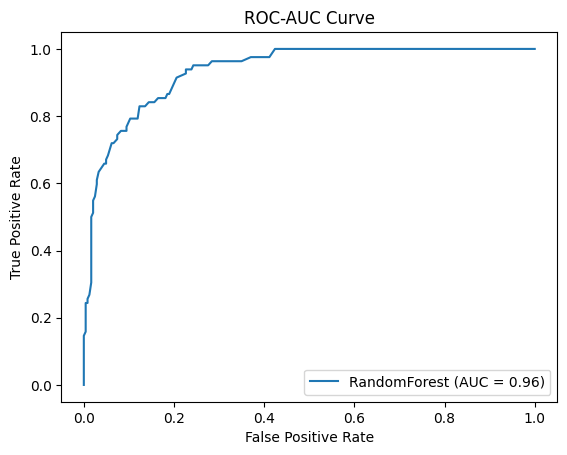

--- GradientBoosting ---
ROC-AUC Score (OvR): 0.96


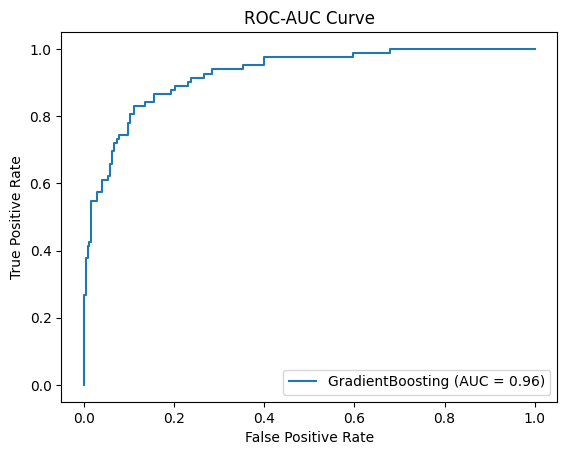

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


--- LightGBM ---
ROC-AUC Score (OvR): 0.96


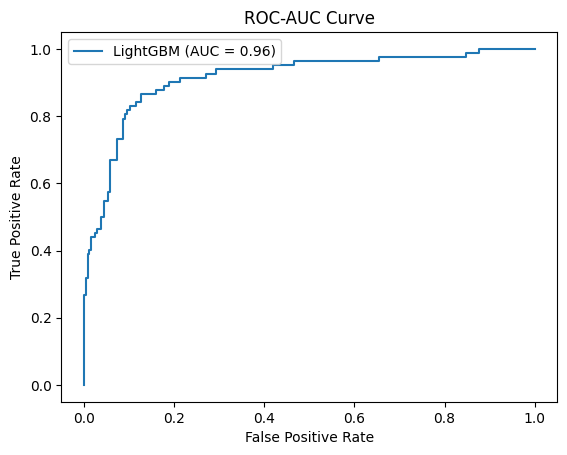

--- SVM ---
ROC-AUC Score (OvR): 0.96
--- Voting Classifier ---
ROC-AUC Score (OvR): 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


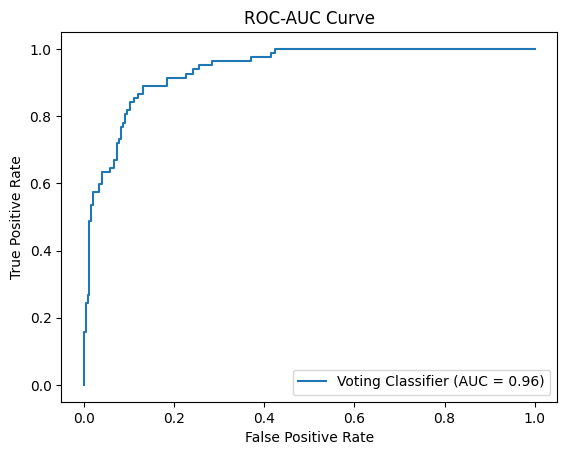

--- Stacking Classifier ---
ROC-AUC Score (OvR): 0.96


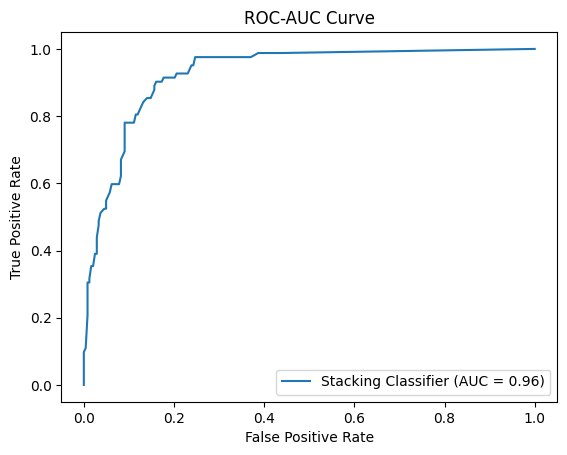

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.special import softmax
import matplotlib.pyplot as plt

# Example: models and model_names lists should already be defined
# models = [RandomForestClassifier(), SVC(probability=True), GradientBoostingClassifier(), ...]
# model_names = ["RandomForest", "SVM", "GradientBoosting", ...]

for model, name in zip(models, model_names):
    if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
        try:
            if hasattr(model, "predict_proba"):
                # Use predict_proba if available
                y_pred_proba = model.predict_proba(X_test)
                auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

                # For binary classification, use probabilities of the positive class for ROC curve
                y_scores = y_pred_proba[:, 1] if y_pred_proba.shape[1] > 1 else y_pred_proba

            elif hasattr(model, "decision_function"):
                # Use decision_function otherwise
                y_scores = model.decision_function(X_test)
                if len(y_scores.shape) > 1:  # Multiclass case
                    y_pred_proba = softmax(y_scores, axis=1)
                    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
                else:  # Binary case
                    auc_score = roc_auc_score(y_test, y_scores)

            # Print AUC score
            print(f"--- {name} ---")
            print(f"ROC-AUC Score (OvR): {auc_score:.2f}")

            # Plot ROC Curve for binary/multiclass
            if len(y_scores.shape) == 1 or y_scores.shape[1] == 2:  # Binary or two-class
                fpr, tpr, _ = roc_curve(y_test, y_scores if len(y_scores.shape) == 1 else y_pred_proba[:, 1], pos_label=1)
                plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title("ROC-AUC Curve")
                plt.legend()
                plt.show()

        except Exception as e:
            print(f"Error in calculating ROC-AUC for {name}: {e}")


### **Summary of Evaluation Results**

**Objective**:
Summarize the evaluation metrics (Accuracy and ROC-AUC) for each model to compare their overall performance.

**Method**:
The results, including accuracy and ROC-AUC scores, are printed for each model in the ensemble. If a metric is not available, it will be displayed.


In [ ]:
print("Evaluation Results Summary:")
for name, metrics in results.items():
    # Get the accuracy and roc_auc, defaulting to None if not available
    accuracy = metrics.get('accuracy', None)
    roc_auc = metrics.get('roc_auc', None)

    # Format and display results
    accuracy_display = f"{accuracy:.4f}" if isinstance(accuracy, (float, int)) else "N/A"
    roc_auc_display = f"{roc_auc:.4f}" if isinstance(roc_auc, (float, int)) else "N/A"

    print(f"{name} - Accuracy: {accuracy_display}, ROC-AUC: {roc_auc_display}")


Evaluation Results Summary:
RandomForest - Accuracy: 0.8092, ROC-AUC: 0.9578
GradientBoosting - Accuracy: 0.8092, ROC-AUC: 0.9557
LightGBM - Accuracy: 0.8215, ROC-AUC: 0.9553
SVM - Accuracy: 0.8308, ROC-AUC: N/A
Voting Classifier - Accuracy: 0.8246, ROC-AUC: 0.9607
Stacking Classifier - Accuracy: 0.8462, ROC-AUC: 0.9622


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)


In [ ]:
for model, name in zip(models, model_names):
    if hasattr(model, "predict_proba") or name != "SVM":
        try:
            y_pred_proba = model.predict_proba(X_test)
            auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
            results[name]["roc_auc"] = auc_score
        except Exception as e:
            print(f"Error in calculating ROC-AUC for {name}: {e}")
    else:
        results[name]["roc_auc"] = "N/A"  # Assign "N/A" for SVM


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
